# Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam , RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import image

from PIL import Image

from sklearn.model_selection import GridSearchCV

from IPython.display import Image 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Building Dataset**

In [0]:
train_datagen = ImageDataGenerator(rotation_range=90,
                                   width_shift_range=0.08,
                                   shear_range=0.3,
                                   height_shift_range=0.08,
                                   rescale = 1./255,
                                   zoom_range = 0.08,
                                   horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/train',
                                                 target_size = (128,128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1005 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/test',
                                                 target_size = (128,128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 450 images belonging to 2 classes.


**Model**

In [0]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (128,128, 3),kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(units = 2, activation = 'softmax'))



In [0]:
optimizer=RMSprop(lr=0.001,rho=0.9)

In [40]:
classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 32)        0         
__________

**Fitting the model**

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)

In [42]:
history=classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 20,
                        validation_data = test_set,
                        validation_steps = 45,
                               callbacks=[learning_rate_reduction] )

Epoch 1/20
100/100 [==============================] - 18s 177ms/step - loss: 0.7185 - acc: 0.6217 - val_loss: 0.5931 - val_acc: 0.7125
Epoch 2/20
100/100 [==============================] - 15s 153ms/step - loss: 0.5603 - acc: 0.7405 - val_loss: 0.4512 - val_acc: 0.8031
Epoch 3/20
100/100 [==============================] - 15s 153ms/step - loss: 0.5299 - acc: 0.7382 - val_loss: 0.4684 - val_acc: 0.7960
Epoch 4/20
100/100 [==============================] - 15s 154ms/step - loss: 0.4998 - acc: 0.7616 - val_loss: 0.4391 - val_acc: 0.8130
Epoch 5/20
100/100 [==============================] - 15s 149ms/step - loss: 0.4804 - acc: 0.7845 - val_loss: 0.4851 - val_acc: 0.7734
Epoch 6/20
100/100 [==============================] - 16s 160ms/step - loss: 0.4538 - acc: 0.8058 - val_loss: 0.4180 - val_acc: 0.8045
Epoch 7/20
100/100 [==============================] - 15s 153ms/step - loss: 0.4551 - acc: 0.7897 - val_loss: 0.3771 - val_acc: 0.8371
Epoch 8/20
100/100 [==============================] - 1

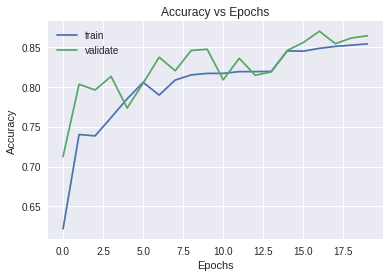

In [43]:
#rmsprop
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(['train','validate'])
plt.show()

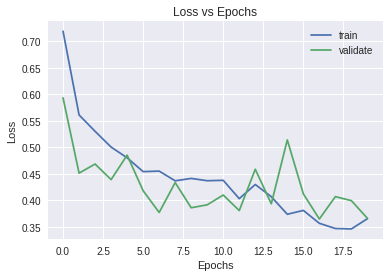

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(['train','validate'])
plt.show()

**Evaluate / Predict**

In [45]:
predict_datagen = ImageDataGenerator(rescale = 1./255)
prediction_set = predict_datagen.flow_from_directory('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict',
                                                 target_size = (128,128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 478 images belonging to 2 classes.


In [0]:
acc, loss = classifier.evaluate_generator(prediction_set)

In [47]:
print("Test Accuracy = %.1f"%(acc*100))

Test Accuracy = 73.0


Predicted Class = [1]


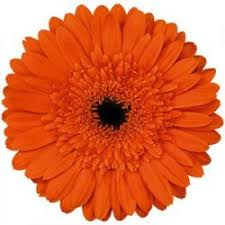

In [68]:
# Fresh Image
test_image1 = image.load_img('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_336.jpg', target_size = (128, 128))

test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
res1=classifier.predict_classes(test_image1)
print("Predicted Class =",res1)
Image(filename='/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_336.jpg')

Predicted Class = [0]


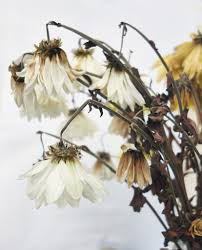

In [70]:
# Wilted Flower

test_image2 = image.load_img('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_281.jpg', target_size = (128, 128))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
res2 = classifier.predict_classes(test_image2)
print("Predicted Class =",res2)

Image(filename='/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_281.jpg')